##**Topic**

###Credit Card Fraud Detection

####**Dataset Details:**

Source: https://www.kaggle.com/datasets/mishra5001/credit-card/data

**I. About:**
- Get insights of the loan defaultes
- Get insights into customer spending behavior and loan defaulters.
- Identify patterns in credit usage, payments, and purchases.
- Perform customer segmentation to group similar spending profiles.
- Help financial institutions optimize marketing strategies and risk management.

**II. Problem statement**
- Financial institutions need to understand customer spending and repayment behavior to provide better credit offerings.
- The dataset helps in identifying potential defaulters by analyzing credit usage patterns.
- Dimensionality reduction (PCA) and clustering techniques can uncover hidden patterns in customer transactions.
- The goal is to segment customers for personalized financial products and risk assessment.

**III. Dataset Information**









### **Assignment**


Part I
1. Sample a subset of the data based on class label
2. Apply PCA and LDA and visualize the results
3. Perform classification using naïve Bayes and interpret the results
4. Perform classification using Logistic Regression and interpret the results
5. Perform classification using SVMs and interpret the results

6. Comment on which approaches might allow you to best identify the confidence of class assignments (e.g. how happy, or how sad rather than just a label)
7. Plot results based on the approach in f.

Part II
1. Apply PCA and LDA. For PCA, plot the incremental gain in capturing the variance in the data for each successive principal component that is added and compare this with the subset of data in step 1.
2. Perform classification using naïve Bayes and interpret and visualize the results
3. Perform classification using Logistic Regression and interpret and visualize the results
4. Perform classification using SVMs and interpret and visualize the results
5. Discuss which classes are most similar / different with some justification given
6. Explain how you might identify faces that are mislabeled in the dataset and provide an implementation.

* Optional

Based on a 7-dimensional vector of confidence values for face identity, plot the position of these in a 2D embedding. The “points” that are shown should be the actual face images within the plot.



# 1. Import libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer

from sklearn.decomposition import PCA

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split



# 2. Load data

In [2]:
application_data = pd.read_csv('application_data.csv')
previous_application = pd.read_csv('previous_application.csv')


In [3]:
application_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
previous_application.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


# 3. Data Exploration Analysis

In [5]:

print(f"application_data shape: {application_data.shape}")
print(f"previous_application shape: {previous_application.shape}")

application_data shape: (307511, 122)
previous_application shape: (1670214, 37)


In [6]:
#identify null values for the application_dataset

application_data.isnull().sum()

,0
SK_ID_CURR,0
TARGET,0
NAME_CONTRACT_TYPE,0
CODE_GENDER,0
FLAG_OWN_CAR,0
...,...
AMT_REQ_CREDIT_BUREAU_DAY,41519
AMT_REQ_CREDIT_BUREAU_WEEK,41519
AMT_REQ_CREDIT_BUREAU_MON,41519
AMT_REQ_CREDIT_BUREAU_QRT,41519


In [7]:
#identify null values for the previous_application_dataset

previous_application.isnull().sum()

,0
SK_ID_PREV,0
SK_ID_CURR,0
NAME_CONTRACT_TYPE,0
AMT_ANNUITY,372235
AMT_APPLICATION,0
AMT_CREDIT,1
AMT_DOWN_PAYMENT,895844
AMT_GOODS_PRICE,385515
WEEKDAY_APPR_PROCESS_START,0
HOUR_APPR_PROCESS_START,0


In [8]:
previous_application['NAME_CONTRACT_TYPE'].unique()


array(['Consumer loans', 'Cash loans', 'Revolving loans', 'XNA'],
      dtype=object)

In [9]:
previous_application['NAME_CONTRACT_TYPE'].value_counts()


,count
NAME_CONTRACT_TYPE,
Cash loans,747553
Consumer loans,729151
Revolving loans,193164
XNA,346




> NAME_CONTRACT_TYPE shows the type of loan the client has or had at the current time. Since all datasets are related to a loan, this column does not add meaningful value to our process. This column will be dropped, and XNA rows will be deleted since it is a loan type non-identified.

Also the following columns does not add value to our dataset since are customer personal information or data related to time

WEEKDAY_APPR_PROCESS_START
HOUR_APPR_PROCESS_START
FLAG_LAST_APPL_PER_CONTRACT
NFLAG_LAST_APPL_IN_DAY
NFLAG_MICRO_CASH

NAME_CASH_LOAN_PURPOSE
NAME_CONTRACT_STATUS
DAYS_DECISION
NAME_PAYMENT_TYPE

NAME_TYPE_SUITE
NAME_CLIENT_TYPE
NAME_GOODS_CATEGORY
NAME_PORTFOLIO
NAME_PRODUCT_TYPE
CHANNEL_TYPE
SELLERPLACE_AREA
NAME_SELLER_INDUSTRY
CNT_PAYMENT
NAME_YIELD_GROUP
PRODUCT_COMBINATION
DAYS_FIRST_DRAWING
DAYS_FIRST_DUE
DAYS_LAST_DUE_1ST_VERSION
DAYS_LAST_DUE
DAYS_TERMINATION
NFLAG_INSURED_ON_APPROVAL




> Finally our previous application dataset will contain only


SK_ID_PREV
SK_ID_CURR

AMT_ANNUITY
AMT_APPLICATION
AMT_CREDIT
AMT_DOWN_PAYMENT
AMT_GOODS_PRICE

RATE_DOWN_PAYMENT
RATE_INTEREST_PRIMARY
RATE_INTEREST_PRIVILEGED
CODE_REJECT_REASON






In [10]:
columns_to_keep_previous_application = [
    'SK_ID_PREV', 'SK_ID_CURR',
    'AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
    'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY', 'RATE_INTEREST_PRIVILEGED', 'CODE_REJECT_REASON'
]

#show columns to keep
previous_application[columns_to_keep_previous_application]



,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,CODE_REJECT_REASON
0,2030495,271877,1730.430,17145.0,17145.0,0.0,17145.0,0.000000,0.182832,0.867336,XAP
1,2802425,108129,25188.615,607500.0,679671.0,NaN,607500.0,NaN,NaN,NaN,XAP
2,2523466,122040,15060.735,112500.0,136444.5,NaN,112500.0,NaN,NaN,NaN,XAP
3,2819243,176158,47041.335,450000.0,470790.0,NaN,450000.0,NaN,NaN,NaN,XAP
4,1784265,202054,31924.395,337500.0,404055.0,NaN,337500.0,NaN,NaN,NaN,HC
...,...,...,...,...,...,...,...,...,...,...,...
1670209,2300464,352015,14704.290,267295.5,311400.0,0.0,267295.5,0.000000,NaN,NaN,XAP
1670210,2357031,334635,6622.020,87750.0,64291.5,29250.0,87750.0,0.340554,NaN,NaN,XAP
1670211,2659632,249544,11520.855,105237.0,102523.5,10525.5,105237.0,0.101401,NaN,NaN,XAP
1670212,2785582,400317,18821.520,180000.0,191880.0,NaN,180000.0,NaN,NaN,NaN,XAP


Let's check the application_data to identify the null values, and columns that might be relevant for our work

In [11]:
application_data.isnull().sum()

,0
SK_ID_CURR,0
TARGET,0
NAME_CONTRACT_TYPE,0
CODE_GENDER,0
FLAG_OWN_CAR,0
...,...
AMT_REQ_CREDIT_BUREAU_DAY,41519
AMT_REQ_CREDIT_BUREAU_WEEK,41519
AMT_REQ_CREDIT_BUREAU_MON,41519
AMT_REQ_CREDIT_BUREAU_QRT,41519


In [12]:
# Ensure all columns are displayed
pd.set_option('display.max_columns', None)

# Show dataset info
application_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB




> After analyzing each column and the meaning of its value we notice a big chunk is related to personal information like:


NAME_TYPE_SUITE
NAME_INCOME_TYPE
NAME_EDUCATION_TYPE
NAME_FAMILY_STATUS
NAME_HOUSING_TYPE
REGION_POPULATION_RELATIVE
DAYS_BIRTH



> which is not relevant for us at the moment since we already have the previous application of the user, therefore we can use part of that dataset along with a few columns of the application dataset, which are related a relevant info like amount of properties owned, days employed, target column which will help us identify if default or not.

Columns to keep

SK_ID_CURR
TARGET
NAME_CONTRACT_TYPE

FLAG_OWN_CAR
FLAG_OWN_REALTY
CNT_CHILDREN
AMT_INCOME_TOTAL
AMT_CREDIT
AMT_ANNUITY
AMT_GOODS_PRICE

DAYS_EMPLOYED
DAYS_REGISTRATION
DAYS_ID_PUBLISH

AMT_REQ_CREDIT_BUREAU_HOUR
AMT_REQ_CREDIT_BUREAU_DAY
AMT_REQ_CREDIT_BUREAU_WEEK
AMT_REQ_CREDIT_BUREAU_MON
AMT_REQ_CREDIT_BUREAU_QRT
AMT_REQ_CREDIT_BUREAU_YEAR




In [13]:
columns_to_keep_application = [
    'SK_ID_CURR',
    'TARGET',
    'FLAG_OWN_CAR',
    'FLAG_OWN_REALTY',
    'CNT_CHILDREN',
    'AMT_INCOME_TOTAL',
    'AMT_CREDIT',
    'AMT_ANNUITY',
    'AMT_GOODS_PRICE',
    'DAYS_EMPLOYED',
    'DAYS_REGISTRATION',
    'DAYS_ID_PUBLISH',
    'AMT_REQ_CREDIT_BUREAU_HOUR',
    'AMT_REQ_CREDIT_BUREAU_DAY',
    'AMT_REQ_CREDIT_BUREAU_WEEK',
    'AMT_REQ_CREDIT_BUREAU_MON',
    'AMT_REQ_CREDIT_BUREAU_QRT',
    'AMT_REQ_CREDIT_BUREAU_YEAR'
]


application_data[columns_to_keep_application]

,SK_ID_CURR,TARGET,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,N,Y,0,202500.0,406597.5,24700.5,351000.0,-637,-3648.0,-2120,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,N,N,0,270000.0,1293502.5,35698.5,1129500.0,-1188,-1186.0,-291,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Y,Y,0,67500.0,135000.0,6750.0,135000.0,-225,-4260.0,-2531,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,N,Y,0,135000.0,312682.5,29686.5,297000.0,-3039,-9833.0,-2437,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,N,Y,0,121500.0,513000.0,21865.5,513000.0,-3038,-4311.0,-3458,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,N,N,0,157500.0,254700.0,27558.0,225000.0,-236,-8456.0,-1982,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,N,Y,0,72000.0,269550.0,12001.5,225000.0,365243,-4388.0,-4090,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,N,Y,0,153000.0,677664.0,29979.0,585000.0,-7921,-6737.0,-5150,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,N,Y,0,171000.0,370107.0,20205.0,319500.0,-4786,-2562.0,-931,0.0,0.0,0.0,0.0,0.0,0.0


# Visualize the data to gain more insights

<Figure size 1600x1200 with 0 Axes>

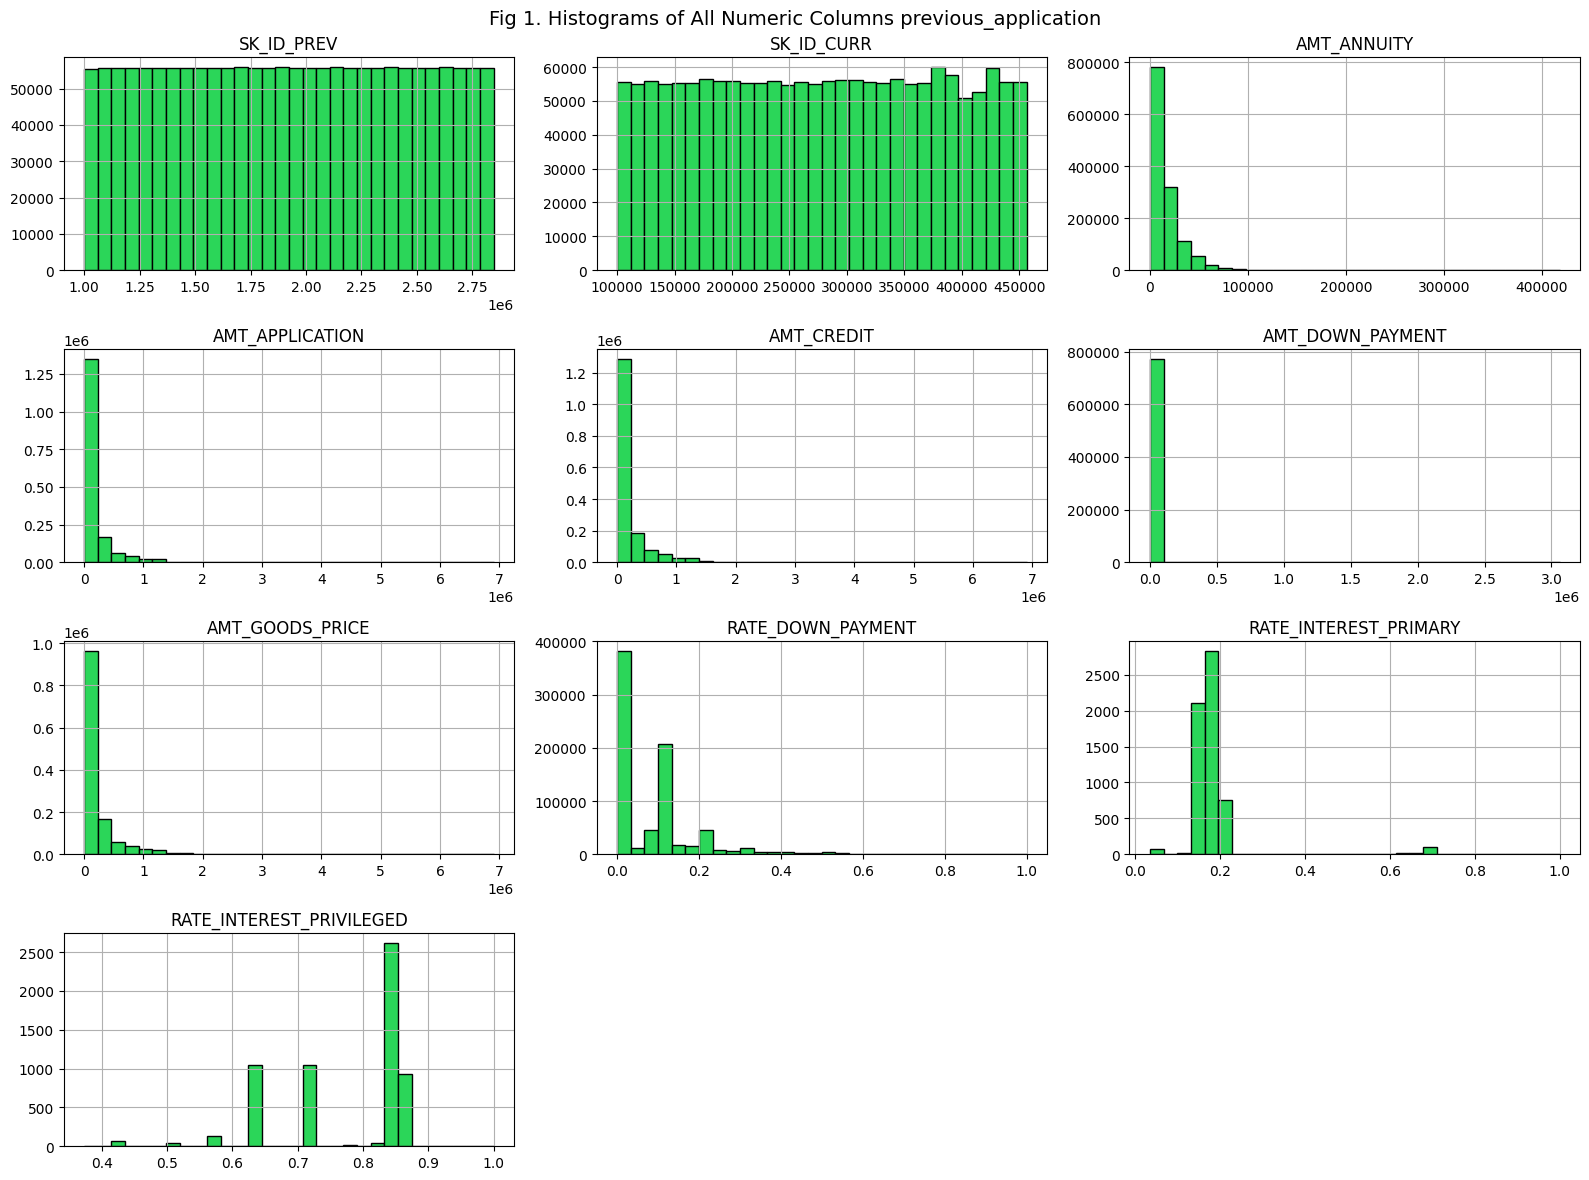

In [14]:
#Histogram of the whole dataset

# Plot histograms for all numeric columns in the dataset
plt.figure(figsize=(16, 12))

# Plot the histograms
previous_application[columns_to_keep_previous_application].hist(bins=30, figsize=(16, 12), color='#2bd659', edgecolor='black')

# Customize the plot
plt.suptitle("Fig 1. Histograms of All Numeric Columns previous_application", fontsize=14)
plt.tight_layout()

# Show the plot
plt.show()

<Figure size 1600x1200 with 0 Axes>

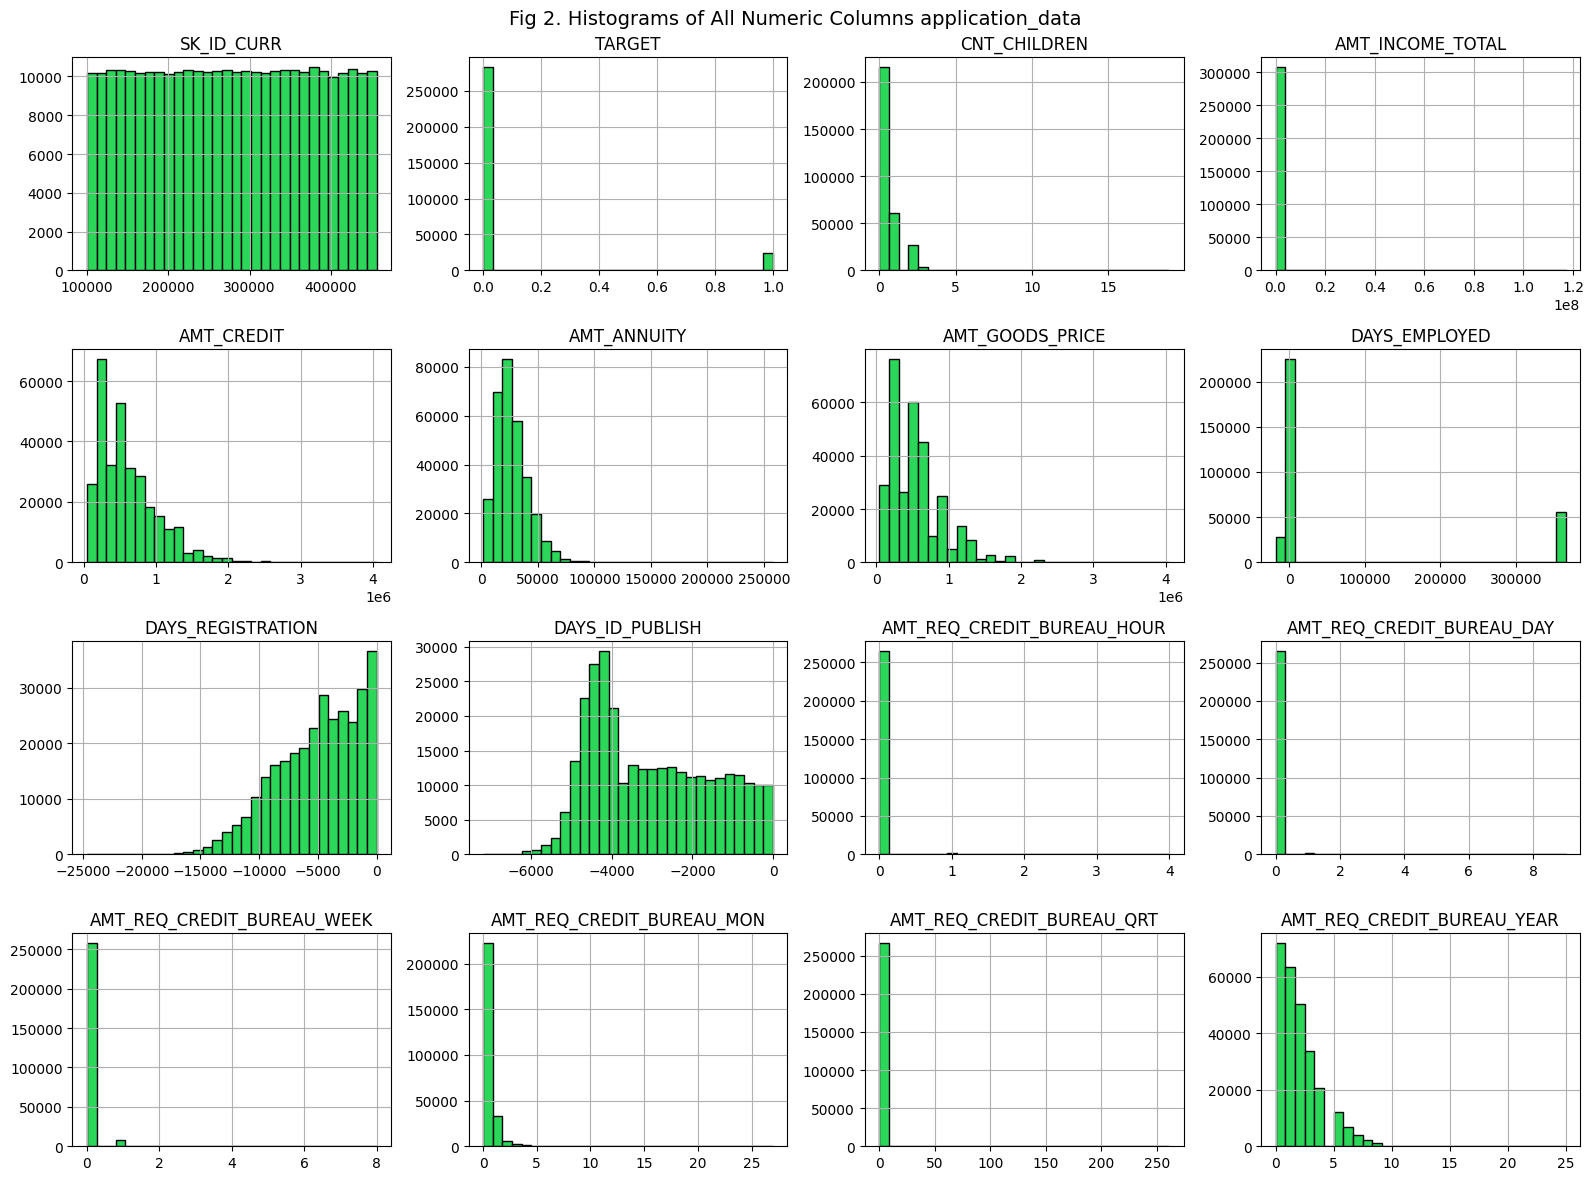

In [15]:
#Histogram of the whole dataset

# Plot histograms for all numeric columns in the dataset
plt.figure(figsize=(16, 12))

# Plot the histograms
application_data[columns_to_keep_application].hist(bins=30, figsize=(16, 12), color='#2bd659', edgecolor='black')

# Customize the plot
plt.suptitle("Fig 2. Histograms of All Numeric Columns application_data", fontsize=14)
plt.tight_layout()

# Show the plot
plt.show()

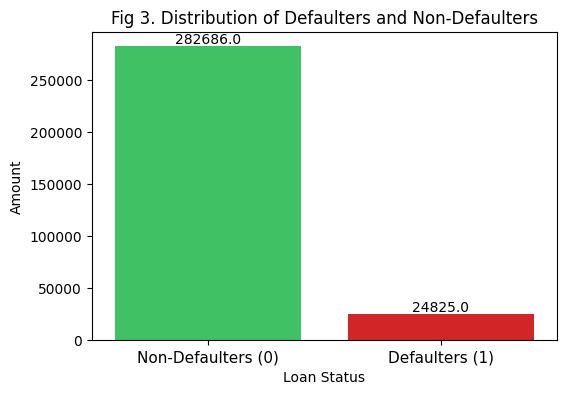

In [16]:
#show the distribution of our data defaulters and not defaulters


# Set figure size
plt.figure(figsize=(6, 4))

# Define color palette
colors = {0:'#2bd659', 1:'#ed090d'}  # Purple for Not Defaulters, Red for Defaulters

# Create the count plot
ax = sns.countplot(x='TARGET', data=application_data, hue='TARGET', palette=colors, legend=False)

# Add labels on bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10)

# Customize title
plt.title("Fig 3. Distribution of Defaulters and Non-Defaulters", fontsize=12, color='black')

# Customize axis labels
plt.xlabel("Loan Status", fontsize=10)
plt.ylabel("Amount", fontsize=10)

# Customize x-tick labels
ax.set_xticks([0, 1])  # Set tick positions
ax.set_xticklabels(["Non-Defaulters (0)", "Defaulters (1)"], fontsize=11)

# Show the plot
plt.show()




> A quick look at our target dataset (TARGET) reveals that it is imbalanced, meaning one class significantly outweighs the other. In this case, the majority of users are non-defaulters (TARGET = 0), while a much smaller portion are defaulters (TARGET = 1).


In [17]:
#users that already have had a loan and the amount of loans they had


# Group previous_application by SK_ID_CURR to count previous loans per user
loan_counts = previous_application.groupby('SK_ID_CURR').size().reset_index(name='Previous_Loan_Count')


In [18]:
# Merge with application_data to ensure we only include users present in both datasets
merged_data = application_data[['SK_ID_CURR']].merge(loan_counts, on='SK_ID_CURR', how='left').fillna(0)

#show how many first users we have
merged_data[merged_data['Previous_Loan_Count'] ==0]


,SK_ID_CURR,Previous_Loan_Count
20,100024,0.0
26,100031,0.0
50,100058,0.0
64,100076,0.0
81,100096,0.0
...,...,...
307242,455951,0.0
307387,456113,0.0
307422,456155,0.0
307449,456187,0.0


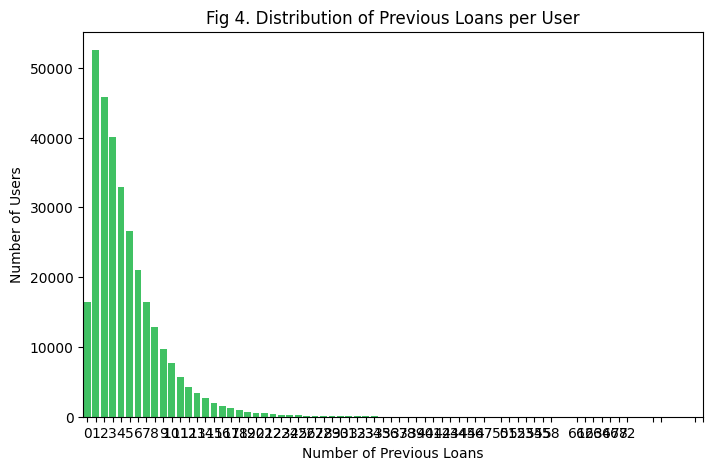

In [19]:

# Convert the column to integers for better visualization
merged_data['Previous_Loan_Count'] = merged_data['Previous_Loan_Count'].astype(int)

# Plot distribution of previous loan counts
plt.figure(figsize=(8, 5))

# Create count plot
ax = sns.countplot(x='Previous_Loan_Count', data=merged_data, color='#2bd659')

# Ensure all x-axis labels are shown
ax.set_xticks(sorted(merged_data['Previous_Loan_Count'].unique()))

# Customize the plot
plt.title("Fig 4. Distribution of Previous Loans per User", fontsize=12)
plt.xlabel("Number of Previous Loans", fontsize=10)
plt.ylabel("Number of Users", fontsize=10)

# Show the plot
plt.show()



> since our fig 2 has some users that have had more than 4 or 5 loans let's see in details how many users exactly fall in each number



In [20]:

# Filter users with 4 or more previous loans
high_loan_users = merged_data[merged_data['Previous_Loan_Count'] >= 4]

# Count the number of users for each loan count
loan_distribution = high_loan_users['Previous_Loan_Count'].value_counts().sort_index()
loan_distribution

,count
Previous_Loan_Count,
4,32922
5,26638
6,21073
7,16384
8,12785
...,...
64,2
67,1
68,1




> There are outliers within the dataset—individuals who have taken out more than six loans in the past. These cases represent extreme borrowing behavior, which could indicate significant financial stress or an ongoing cycle of debt accumulation. Identifying such outliers is crucial for understanding patterns of excessive borrowing and for implementing strategies to mitigate potential risks associated with these individuals.



> let's see the amount of users that have had a loan a defaulter, knowing that our total of defaulters is 5,163



In [21]:
# Merge again to include the 'TARGET' column
merged_data = merged_data.merge(application_data[['SK_ID_CURR', 'TARGET']], on='SK_ID_CURR', how='left')

# Filter users who had at least one previous loan
users_with_loans = merged_data[merged_data['Previous_Loan_Count'] > 0]

# Filter users who are also defaulters (TARGET = 1)
defaulters_with_loans = users_with_loans[users_with_loans['TARGET'] == 1]

# Count the number of such users
num_defaulters_with_loans = defaulters_with_loans.shape[0]

print(f"Number of users who had a loan and defaulted: {num_defaulters_with_loans}")


Number of users who had a loan and defaulted: 23845


In [22]:
#percentage of defaulters with recurrent loans

percentage = num_defaulters_with_loans/ application_data[application_data['TARGET'] ==1]['TARGET'].count()  * 100
print(f"Percentage of defaulters with recurrent loans: {percentage:.2f}%")

Percentage of defaulters with recurrent loans: 96.05%




> Approximately 31% of defaulters have a history of recurrent loans, indicating that a significant portion of individuals who default on loans have taken out multiple loans in the past. This recurring borrowing behavior among defaulters could suggest patterns of financial instability or challenges in managing debt. Understanding this relationship between loan recurrence and default status is crucial for developing more effective strategies to mitigate risks and manage credit more responsibly.



In [23]:
# Filter the rows where AMT_CREDIT > 0
credit_asked = previous_application[previous_application['AMT_CREDIT'] > 0]

# Calculate the average loan amount
average_loan_amount = credit_asked['AMT_CREDIT'].mean()

# Print the average loan amount
print(f"The average amount of loan asked is: {average_loan_amount:.2f}")


The average amount of loan asked is: 245643.57


In [24]:
print('Amount of users asking above 1 million', credit_asked[credit_asked['AMT_CREDIT'] > 1000000].shape)
print('Amount of users ', credit_asked.shape)

print('Percentage of users asking above 1 million', (credit_asked[credit_asked['AMT_CREDIT'] > 1000000].shape[0] / credit_asked.shape[0] * 100))

Amount of users asking above 1 million (63493, 37)
Amount of users  (1333445, 37)
Percentage of users asking above 1 million 4.761576217991744


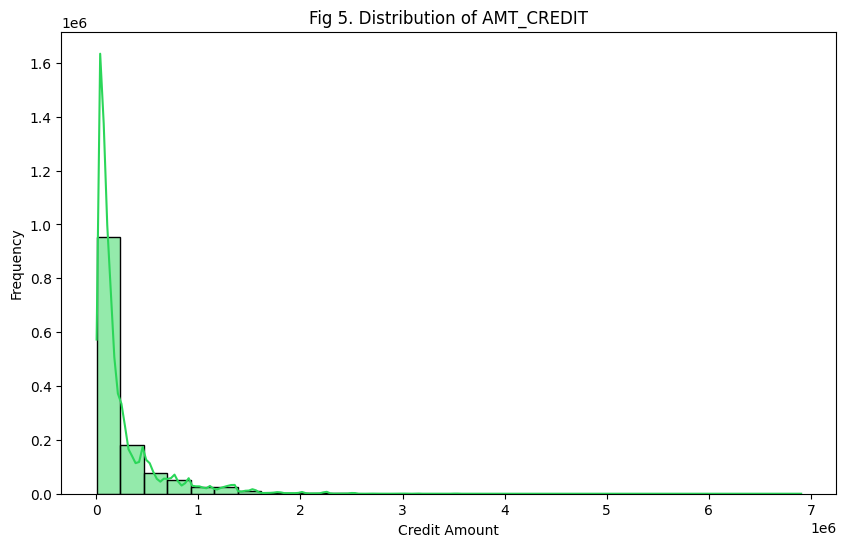

In [25]:
# Plot the distribution of AMT_CREDIT
plt.figure(figsize=(10, 6))

# Using seaborn's histplot to visualize the distribution
sns.histplot(credit_asked['AMT_CREDIT'], bins=30, kde=True, color='#2bd659')

# Customize the plot
plt.title("Fig 5. Distribution of AMT_CREDIT", fontsize=12)
plt.xlabel("Credit Amount", fontsize=10)
plt.ylabel("Frequency", fontsize=10)

# Show the plot
plt.show()




> This distribution reveals that a significant portion of the population requests loan amounts in the thousands and higher, with most applicants seeking large sums, on average of $233,746.52, and almost 5%  of the users asking for + millions. This trend highlights the tendency for individuals to apply for substantial credit, potentially indicating a preference for more significant financial commitments or a need for more considerable funding.





In [26]:
# Calculate the average credit amount requested in the previous application
average_credit_application = previous_application['AMT_APPLICATION'].mean()

# Print the average credit amount
print(f"The average credit amount requested in the previous application is: {average_credit_application:.2f}")


The average credit amount requested in the previous application is: 175233.86


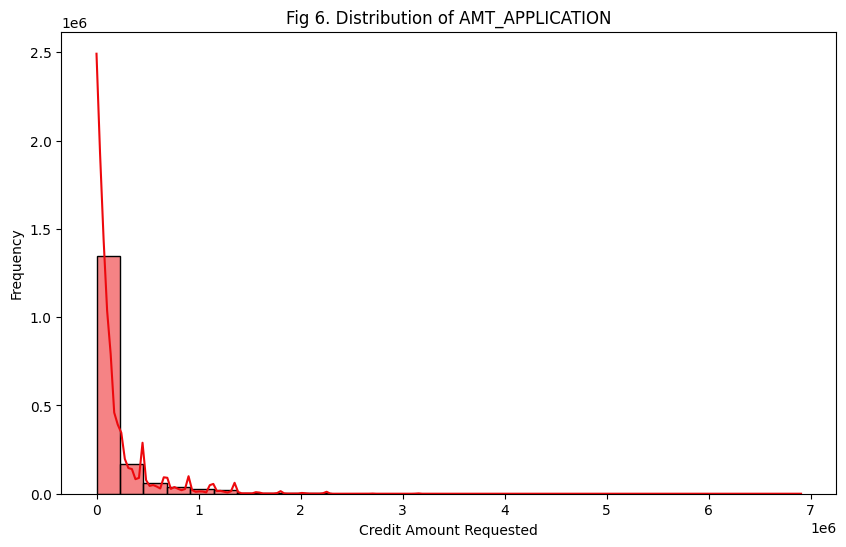

In [27]:
#For how much credit did client ask on the previous application


# Plot the distribution of AMT_APPLICATION
plt.figure(figsize=(10, 6))

# Using seaborn's histplot to visualize the distribution
sns.histplot(previous_application['AMT_APPLICATION'], bins=30, kde=True, color='#ed090d')

# Customize the plot
plt.title("Fig 6. Distribution of AMT_APPLICATION", fontsize=12)
plt.xlabel("Credit Amount Requested", fontsize=10)
plt.ylabel("Frequency", fontsize=10)

# Show the plot
plt.show()





> The amount of credit requested by clients in the previous application (AMT_APPLICATION) exhibits a similar tendency to the AMT_CREDIT column, with both showing a concentration of applicants seeking large loan amounts, often in the thousands. This suggests a consistent trend in the financial behavior of clients, where substantial credit requests are common across both current and previous applications.





# 4. Preprocesing Steps

To decide whether previous_application or application_data is better suited for applying PCA (Principal Component Analysis) and LDA (Linear Discriminant Analysis), we need to consider the following:


1.Target Variable:
- LDA requires the target variable (class labels) for supervised learning, since application_data has the target variable, LDA would be more appropriate for that dataset.
- PCA is unsupervised, meaning it doesn’t require class labels, so either dataset can work for PCA.

2. Nature of Data:
- previous_application contains details about previous loans, including loan amounts, down payments, and other features related to previous loans, which could be relevant for understanding patterns based on the loan request and history.
- application_data contains broader financial and personal information (e.g., income, credit amount, annuity, children count) for each applicant and may offer a more diverse feature set.


Since PCA is often used to reduce dimensions in large datasets while retaining as much variance as possible. Given that application_data has broader features related to the applicant’s financial status it would be more suitable for PCA.

In [28]:
application_data[columns_to_keep_application].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 18 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_ID_CURR                  307511 non-null  int64  
 1   TARGET                      307511 non-null  int64  
 2   FLAG_OWN_CAR                307511 non-null  object 
 3   FLAG_OWN_REALTY             307511 non-null  object 
 4   CNT_CHILDREN                307511 non-null  int64  
 5   AMT_INCOME_TOTAL            307511 non-null  float64
 6   AMT_CREDIT                  307511 non-null  float64
 7   AMT_ANNUITY                 307499 non-null  float64
 8   AMT_GOODS_PRICE             307233 non-null  float64
 9   DAYS_EMPLOYED               307511 non-null  int64  
 10  DAYS_REGISTRATION           307511 non-null  float64
 11  DAYS_ID_PUBLISH             307511 non-null  int64  
 12  AMT_REQ_CREDIT_BUREAU_HOUR  265992 non-null  float64
 13  AMT_REQ_CREDIT

## I. Missing Values

In [29]:
#make a copy of our df
df = application_data[columns_to_keep_application]

In [30]:
#Extract columns -- Impute numerical columns with their median or mean, and categorical with mode
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns


In [31]:
numerical_cols

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

In [32]:
categorical_cols

Index(['FLAG_OWN_CAR', 'FLAG_OWN_REALTY'], dtype='object')

In [33]:
# Imputer for numerical features
numerical_imputer = SimpleImputer(strategy='median')  # You can also use 'mean'
df[numerical_cols] = numerical_imputer.fit_transform(df[numerical_cols])


<ipython-input-33-ff9572fcfa29>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numerical_cols] = numerical_imputer.fit_transform(df[numerical_cols])


In [34]:
# Imputer for categorical features (if needed)
categorical_imputer = SimpleImputer(strategy='most_frequent')  # Mode for categorical features
df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])


<ipython-input-34-c20efdf40be9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[categorical_cols] = categorical_imputer.fit_transform(df[categorical_cols])


## II. Handle Categorical variables

In [35]:
#use label encoder for categorical variables
label_encoder = LabelEncoder()

In [36]:

# Label encode categorical columns that are binary (e.g., FLAG_OWN_CAR)
df['FLAG_OWN_CAR'] = label_encoder.fit_transform(df['FLAG_OWN_CAR'])
df['FLAG_OWN_REALTY'] = label_encoder.fit_transform(df['FLAG_OWN_REALTY'])


<ipython-input-36-e543a99463ff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FLAG_OWN_CAR'] = label_encoder.fit_transform(df['FLAG_OWN_CAR'])
<ipython-input-36-e543a99463ff>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FLAG_OWN_REALTY'] = label_encoder.fit_transform(df['FLAG_OWN_REALTY'])


## III. Keep usefull Variables

In [37]:
X = df.drop(columns=['SK_ID_CURR', 'TARGET']) # Drop the ID column 'SK_ID_CURR'

y = df['TARGET']  # Keep 'TARGET' for LDA



## IV. Standardize the data

In [38]:
# Scaling the Data (Standardizing)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [39]:
#show values scaled
X_scaled


array([[-0.71791354,  0.66453139, -0.57753784, ..., -0.26994654,
        -0.30861959, -0.44092567],
       [-0.71791354, -1.5048198 , -0.57753784, ..., -0.26994654,
        -0.30861959, -1.00733095],
       [ 1.39292539,  0.66453139, -0.57753784, ..., -0.26994654,
        -0.30861959, -1.00733095],
       ...,
       [-0.71791354,  0.66453139, -0.57753784, ...,  0.89717516,
        -0.30861959, -0.44092567],
       [-0.71791354,  0.66453139, -0.57753784, ..., -0.26994654,
        -0.30861959, -1.00733095],
       [-0.71791354, -1.5048198 , -0.57753784, ...,  2.06429685,
        -0.30861959, -0.44092567]])

# PART 1



### I. Sample a subset of the data based on class label

In [40]:
#show x and y

print1 = X.shape
print2 = y.shape
print(print1)
print(print2)

(307511, 16)
(307511,)


In [41]:
X.head()

,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,1,0.0,202500.0,406597.5,24700.5,351000.0,-637.0,-3648.0,-2120.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,0,0.0,270000.0,1293502.5,35698.5,1129500.0,-1188.0,-1186.0,-291.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,1,0.0,67500.0,135000.0,6750.0,135000.0,-225.0,-4260.0,-2531.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1,0.0,135000.0,312682.5,29686.5,297000.0,-3039.0,-9833.0,-2437.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,1,0.0,121500.0,513000.0,21865.5,513000.0,-3038.0,-4311.0,-3458.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
#x after StandardScaler
X_scaled.shape

(307511, 16)

In [43]:
X_scaled

array([[-0.71791354,  0.66453139, -0.57753784, ..., -0.26994654,
        -0.30861959, -0.44092567],
       [-0.71791354, -1.5048198 , -0.57753784, ..., -0.26994654,
        -0.30861959, -1.00733095],
       [ 1.39292539,  0.66453139, -0.57753784, ..., -0.26994654,
        -0.30861959, -1.00733095],
       ...,
       [-0.71791354,  0.66453139, -0.57753784, ...,  0.89717516,
        -0.30861959, -0.44092567],
       [-0.71791354,  0.66453139, -0.57753784, ..., -0.26994654,
        -0.30861959, -1.00733095],
       [-0.71791354, -1.5048198 , -0.57753784, ...,  2.06429685,
        -0.30861959, -0.44092567]])

In [44]:
y.head()

,TARGET
0,1.0
1,0.0
2,0.0
3,0.0
4,0.0


In [45]:
# Check the unique values in the TARGET column
print(y.unique())

# Check the distribution of classes in the TARGET column
print(y.value_counts())


[1. 0.]
TARGET
0.0    282686
1.0     24825
Name: count, dtype: int64


>To apply LDA, it is essential to have a balanced representation of both classes. You can either undersample the majority class (0.0) or oversample the minority class (1.0) using techniques like SMOTE (Synthetic Minority Over-sampling Technique).





In [46]:

# Split data into train and test sets 30% for test and rando state 42
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Apply SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)




In [47]:
print("Shape of X_scaled:", X_scaled.shape)
print("Shape of y_train_balanced:", y_train_balanced.shape)


Shape of X_scaled: (307511, 16)
Shape of y_train_balanced: (395690,)


In [48]:
# If y_train_balanced is a different length than X_scaled, align them
y_train_balanced = y_train_balanced[:X_scaled.shape[0]]  # Adjust to match the length of X_scaled
y_train_balanced

,TARGET
0,0.0
1,1.0
2,0.0
3,0.0
4,0.0
...,...
307506,1.0
307507,1.0
307508,1.0
307509,1.0


### II. Apply PCA and LDA and visualize the results

In [49]:
# PCA 2 components
pca = PCA(n_components=2)  # Reduce to 2 components for visualization
X_pca = pca.fit_transform(X_scaled)


In [50]:
X_pca.shape

(307511, 2)

In [51]:
# Extract PCA values and convert to DataFrame
X_pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
X_pca_df.head()

,PC1,PC2
0,-0.699246,-0.362298
1,2.359293,-0.883615
2,-1.871400,-1.000679
3,-0.863005,0.504029
4,-0.463388,0.043329


In [52]:
loadings = pd.DataFrame(
    pca.components_.T,  # Transpose to match variables with components
    columns=["PC1", "PC2"],
    index=X.columns  # Original variable names
)
print(loadings)


                                 PC1       PC2
FLAG_OWN_CAR                0.139054 -0.267763
FLAG_OWN_REALTY            -0.034238  0.087938
CNT_CHILDREN                0.034227 -0.429498
AMT_INCOME_TOTAL            0.168549 -0.056223
AMT_CREDIT                  0.570794  0.111111
AMT_ANNUITY                 0.528505  0.054534
AMT_GOODS_PRICE             0.572091  0.111859
DAYS_EMPLOYED              -0.105853  0.583917
DAYS_REGISTRATION           0.044850 -0.460367
DAYS_ID_PUBLISH             0.018155 -0.359605
AMT_REQ_CREDIT_BUREAU_HOUR  0.001338 -0.002968
AMT_REQ_CREDIT_BUREAU_DAY   0.005244  0.008226
AMT_REQ_CREDIT_BUREAU_WEEK  0.005153  0.018686
AMT_REQ_CREDIT_BUREAU_MON   0.052274  0.007559
AMT_REQ_CREDIT_BUREAU_QRT   0.013795  0.063338
AMT_REQ_CREDIT_BUREAU_YEAR -0.031223  0.135648



> A high absolute value in a column (PC1 or PC2) means that the variable contributes significantly to that principal component.


> Positive and negative values indicate the direction of contribution.

The following have high weight for PC1, meaning they are essential in the principal component
- AMT_CREDIT                  0.570794  0.111111
- AMT_ANNUITY                 0.528505  0.054534
- AMT_GOODS_PRICE             0.572091  0.111859




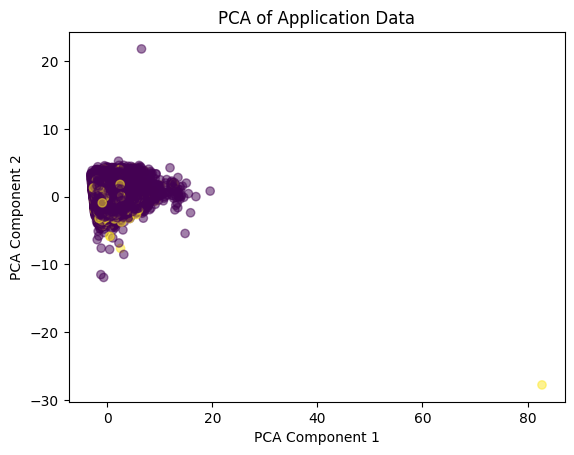

In [53]:

# Visualize PCA
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.5)
plt.title('PCA of Application Data')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

This results shows:

Low Variance in Data After PCA, The first two principal components do not capture much variance from the original dataset.

Data Might Be Highly Correlated, If most variables in your dataset are highly correlated, PCA may not separate them effectively.

The original dataset may not contain clear clusters or groupings

In [54]:
# Apply PCA with 5 components, to see the difference
pca = PCA(n_components=5)
X_pca = pca.fit_transform(X_scaled)


In [55]:

loadings = pd.DataFrame(
    pca.components_.T,  # Transpose to match variables with components
    columns=["PC1", "PC2", "PC3",  "PC4", "PC5" ],
    index=X.columns  # Original variable names
)
print(loadings)

                                 PC1       PC2       PC3       PC4       PC5
FLAG_OWN_CAR                0.139054 -0.267763  0.015680  0.173748 -0.270908
FLAG_OWN_REALTY            -0.034238  0.087938 -0.010139  0.345000  0.179434
CNT_CHILDREN                0.034227 -0.429498  0.012082  0.210894 -0.471819
AMT_INCOME_TOTAL            0.168549 -0.056223  0.014097  0.200432  0.027137
AMT_CREDIT                  0.570794  0.111111 -0.010483 -0.046882  0.016475
AMT_ANNUITY                 0.528505  0.054534  0.000376  0.007940  0.029939
AMT_GOODS_PRICE             0.572091  0.111859 -0.009913 -0.048686  0.013424
DAYS_EMPLOYED              -0.105853  0.583917 -0.010093 -0.009747 -0.180659
DAYS_REGISTRATION           0.044850 -0.460367  0.006628  0.128216 -0.074883
DAYS_ID_PUBLISH             0.018155 -0.359605 -0.008778 -0.200319  0.735463
AMT_REQ_CREDIT_BUREAU_HOUR  0.001338 -0.002968  0.513574 -0.074043  0.006107
AMT_REQ_CREDIT_BUREAU_DAY   0.005244  0.008226  0.701678 -0.040762 -0.001679

- DAYS_ID_PUBLISH have a high (PC5) inverse relation with the principal component

PC3
- AMT_REQ_CREDIT_BUREAU_DAY
- AMT_REQ_CREDIT_BUREAU_HOUR

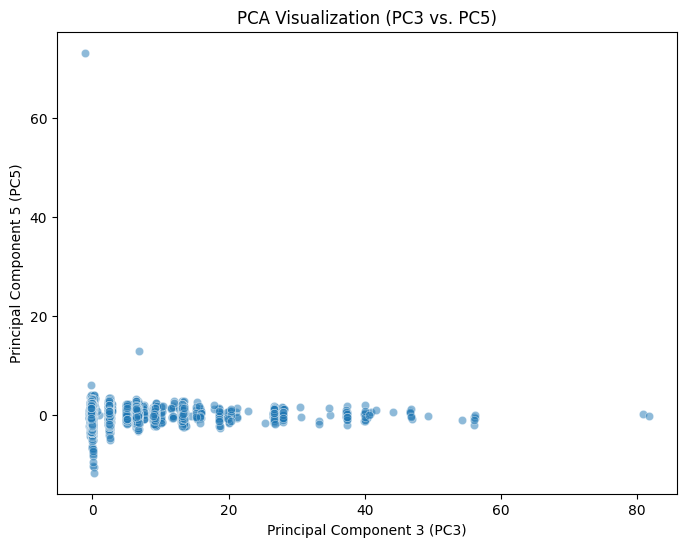

In [56]:

# Extract the first two principal components for visualization
pc1 = X_pca[:, 2]  # PC3 Principal Component
pc2 = X_pca[:, 4]  # PC5 Principal Component

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pc1, y=pc2, alpha=0.5)  # Alpha for transparency

# Labels and title
plt.xlabel("Principal Component 3 (PC3)")
plt.ylabel("Principal Component 5 (PC5)")
plt.title("PCA Visualization (PC3 vs. PC5)")

# Show plot
plt.show()

The points show a trend along the line,  PC3 and PC5 may be positively correlated.

In [57]:

print(X_scaled.shape)
print(y_train_balanced.shape)

(307511, 16)
(307511,)


In [58]:
# Check the number of unique classes in the target variable
n_classes = len(np.unique(y_train_balanced))
print(f"Number of classes: {n_classes} , since the number of classes is 2 the number of components for LDA will be 1")

Number of classes: 2 , since the number of classes is 2 the number of components for LDA will be 1


In [59]:

# Initialize LDA with the appropriate number of components
lda = LinearDiscriminantAnalysis(n_components=1)

# Apply LDA
X_lda = lda.fit_transform(X_scaled, y_train_balanced)

# Check the shape of the transformed data
X_lda.shape


(307511, 1)

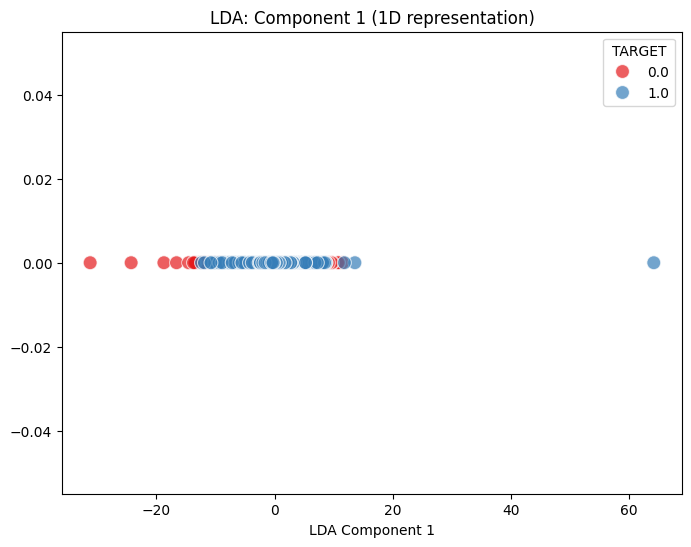

In [60]:

# Scatter plot of the LDA component (1 component)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_lda[:, 0], y=[0]*len(X_lda), hue=y_train_balanced, palette='Set1', alpha=0.7, s=100)

# Labels and title
plt.xlabel("LDA Component 1")
plt.title("LDA: Component 1 (1D representation)")

plt.show()


<ipython-input-61-946a2b9fa999>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y_train_balanced, y=X_lda[:, 0], palette='Set1')


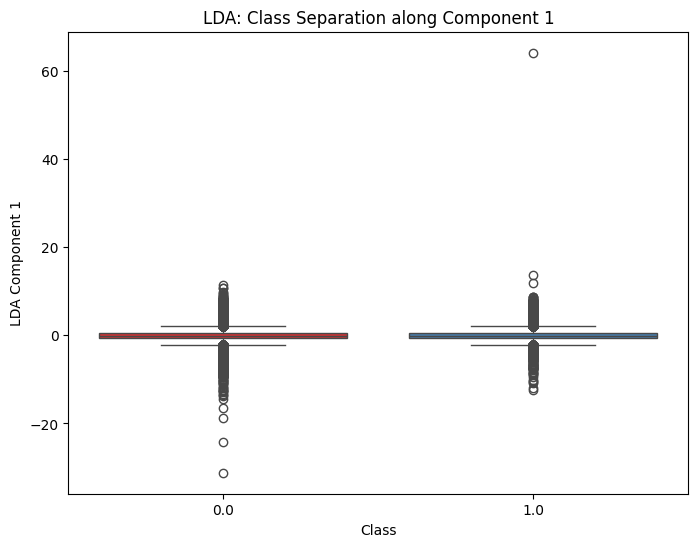

In [61]:
# Boxplot to show class separation along the LDA component
plt.figure(figsize=(8, 6))
sns.boxplot(x=y_train_balanced, y=X_lda[:, 0], palette='Set1')

# Labels and title
plt.xlabel("Class")
plt.ylabel("LDA Component 1")
plt.title("LDA: Class Separation along Component 1")

plt.show()


Since the points are well separated in the scatter plot and in the boxplot it shows  clear class distinctions along the LDA component, this indicates that the dimensionality reduction using LDA was successful in separating the classes.





## III. Perform classification using naïve Bayes and interpret the results



In [74]:
# using GaussianNB: For continuous data that follows a Gaussian (normal) distribution.

# Initialize Gaussian Naive Bayes
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_scaled, y_train_balanced)

# Make predictions
y_pred_naives = nb_model.predict(X_scaled)

# Evaluate the model
accuracy = accuracy_score(y_train_balanced, y_pred_naives)
print("Accuracy:", accuracy)

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_train_balanced, y_pred_naives))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_train_balanced, y_pred_naives))


Accuracy: 0.4628517353850757

Classification Report:
              precision    recall  f1-score   support

         0.0       0.64      0.37      0.47    197845
         1.0       0.36      0.62      0.45    109666

    accuracy                           0.46    307511
   macro avg       0.50      0.50      0.46    307511
weighted avg       0.54      0.46      0.47    307511


Confusion Matrix:
[[ 73958 123887]
 [ 41292  68374]]




> As we already knew handling a dataset with imbalanced data can be dificult, and this is shown in the results of Naïves bayes. The model is struggling with class imbalance, it performs better at predicting class 1 (defaulters) with a higher recall, but its precision is lower, meaning many of its predictions for class 1 are incorrect.

> It performs worse on class 0 (non-defaulters) with a much lower recall, missing many actual negative cases.

> The accuracy is low, and the F1-scores are also below average, meaning the model needs further improvement.



In [63]:


# Cross-validation to evaluate the model
cv_scores = cross_val_score(nb_model, X_scaled, y_train_balanced, cv=5)  # 5-fold cross-validation
print("\nCross-validation Scores:", cv_scores)
print("Mean Cross-validation Score:", cv_scores.mean())


Cross-validation Scores: [0.62709136 0.38429645 0.45081461 0.47352932 0.46231017]
Mean Cross-validation Score: 0.479608379918177


> The low and variable scores suggest that the model might not be well-tuned or may not be suitable for the task at hand.

> The mean score of 47.96% indicates that the model is underperforming, especially if your target classes are imbalanced.

## IV. Perform classification using Logistic Regression and interpret the results



In [75]:
# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# Train the model on the scaled features
log_reg.fit(X_scaled, y_train_balanced)

# Predict on the training set
y_pred_log = log_reg.predict(X_scaled)

# Evaluate the model
accuracy = accuracy_score(y_train_balanced, y_pred_log)
print(f"Accuracy: {accuracy}")

# Classification report for precision, recall, f1-score, etc.
print("\nClassification Report:")
print(classification_report(y_train_balanced, y_pred_log))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_train_balanced, y_pred_log))

# Cross-validation scores
cross_val_scores = cross_val_score(log_reg, X_scaled, y_train_balanced, cv=5)
print("\nCross-validation Scores:", cross_val_scores)
print(f"Mean Cross-validation Score: {cross_val_scores.mean()}")

Accuracy: 0.6433786108464412

Classification Report:
              precision    recall  f1-score   support

         0.0       0.64      1.00      0.78    197845
         1.0       1.00      0.00      0.00    109666

    accuracy                           0.64    307511
   macro avg       0.82      0.50      0.39    307511
weighted avg       0.77      0.64      0.50    307511


Confusion Matrix:
[[197845      0]
 [109665      1]]

Cross-validation Scores: [0.64335073 0.64337745 0.64337745 0.64337745 0.64337745]
Mean Cross-validation Score: 0.6433721070835717


> The results from the Logistic Regression model suggest that while the model has some positive attributes, it also has issues that need to be addressed, particularly with its ability to predict the minority class (dafaulters).

> The model's failure to predict class 1 accurately suggests there is class imbalance, where the majority class (non-defaulters) dominates. The model may be biased toward predicting the majority class, as shown by its 100% recall for class 0 and 0% recall for class 1.

> The F1-score for class 1 is 0, which is a major red flag. Even though the accuracy is 64%, the model's inability to predict class 1 is a serious concern for real-world applications, especially if class 1 is of significant importance.

> In conclusion, while the logistic regression model has some stable performance, it needs improvement in handling the minority class (defaulters). Addressing class imbalance and tuning the model could lead to better performance.

## V. Perform classification using SVMs and interpret the results



In [65]:
# Reduce the dimensionality of the data using PCA before applying svm
pca = PCA(n_components=5)  # You can choose fewer components to reduce complexity
X_reduced = pca.fit_transform(X_scaled)

In [66]:
X_reduced.shape

(307511, 5)

In [67]:
X_train_sample, _, y_train_sample, _ = train_test_split(X_reduced, y_train_balanced, train_size=0.1, random_state=42)


In [68]:
print(X_train_sample.shape)
print(y_train_sample.shape)

(30751, 5)
(30751,)


In [69]:
# Initialize the Support Vector Classifier (SVM)
svm_model = SVC(kernel='linear', random_state=42)

# Fit the model
svm_model.fit(X_train_sample, y_train_sample)


SVC(kernel='linear', random_state=42)

In [73]:

# Predict using the model
y_pred_svm = svm_model.predict(X_train_sample)

# Evaluate accuracy
accuracy = accuracy_score(y_train_sample, y_pred_svm)
print(f"Accuracy: {accuracy}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_train_sample, y_pred_svm))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_train_sample, y_pred_svm))

# Cross-validation y_train_sample
cv_scores = cross_val_score(svm_model, X_train_sample, y_train_sample, cv=5)
print("\nCross-validation Scores:", cv_scores)
print(f"Mean Cross-validation Score: {cv_scores.mean()}")

Accuracy: 0.6416701895873305

Classification Report:
              precision    recall  f1-score   support

         0.0       0.64      1.00      0.78     19732
         1.0       0.00      0.00      0.00     11019

    accuracy                           0.64     30751
   macro avg       0.32      0.50      0.39     30751
weighted avg       0.41      0.64      0.50     30751


Confusion Matrix:
[[19732     0]
 [11019     0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Cross-validation Scores: [0.64168428 0.64162602 0.64162602 0.64162602 0.64178862]
Mean Cross-validation Score: 0.6416701891291389


> Accuracy of 64% indicates that the model correctly classified some of the instances.

> Recall: 1.00 — The model identified 100% of the actual class 0 instances.

>The SVM classifier only predicts class 0, ignoring class 1 entirely. This issue is due to the class imbalance, where the model is biased towards the majority class (class 0).

>Cross-validation results are consistent, with all scores around 64%, showing that the model performance is stable across different folds.

> Mean Cross-validation Score: 64%, aligns with the overall accuracy of the model.

> Since SVM seems to be biased towards the majority class, we can experiment with ensemble methods like Random Forests or Gradient Boosting. Since these algorithms tend to perform better on imbalanced datasets.


## VI. Comment on which approaches might allow you to best identify the confidence of class assignments (e.g. how happy, or how sad rather than just a label)



Given the results and comparing the differents acurracy results

- Naïves 46.28%
- Logistic Reg 64.33%
- SVM  64%


Although SVM showed similar accuracy to Logistic Regression, its failure to handle class imbalance makes it unsuitable for this specific task. Logistic Regression, on the other hand, offers a more balanced approach, and its stability and interpretability make it the better choice for practical deployment. Therefore, we should discard the SVM and move forward with Logistic Regression, potentially improving its performance by applying techniques like class weights or SMOTE for better handling of the class imbalance.

## VII. Plot results based on the approach in VI.

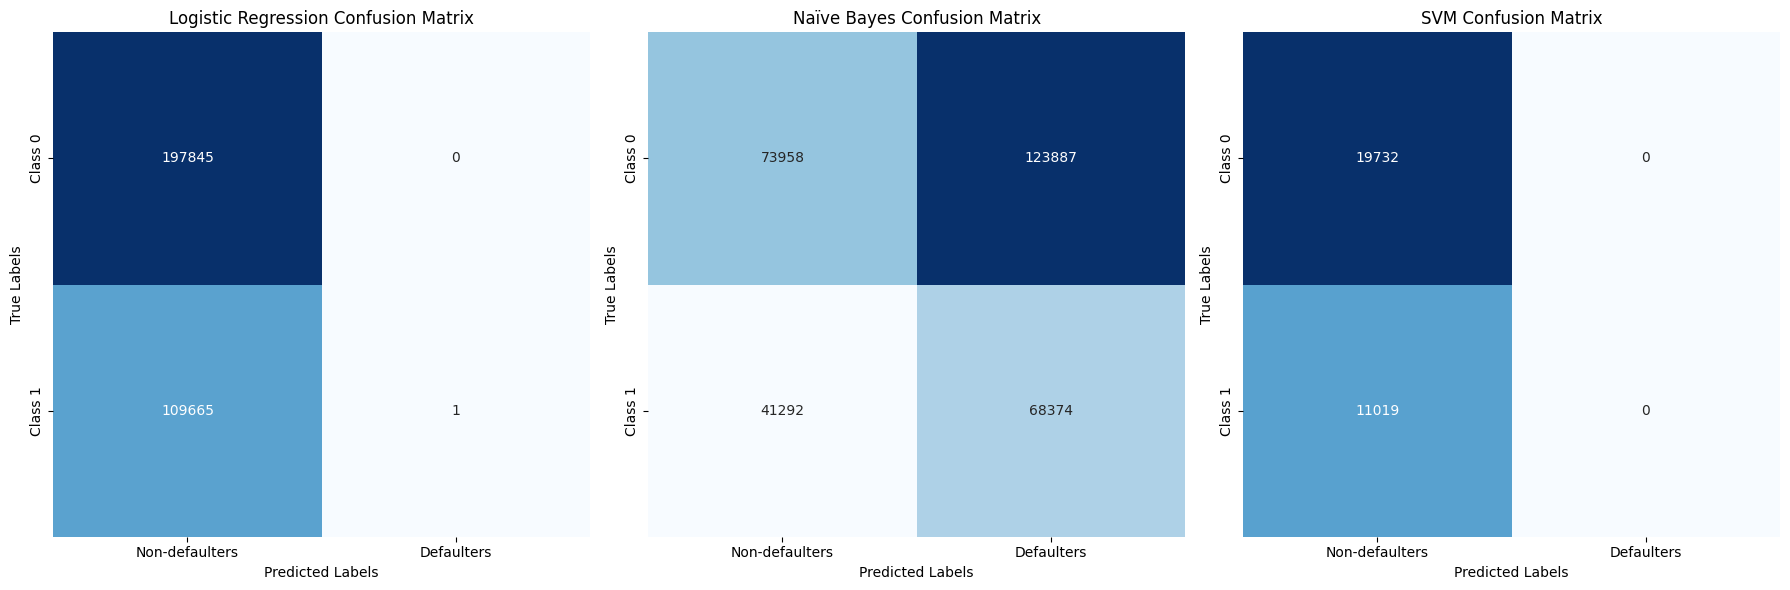

In [78]:

# Calculate confusion matrices for each model
cm_lr = confusion_matrix(y_train_balanced, y_pred_log)
cm_nb = confusion_matrix(y_train_balanced, y_pred_naives)
cm_svm = confusion_matrix(y_train_sample, y_pred_svm)

# Create subplots
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Plot confusion matrix for Naïve Bayes
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues", ax=ax[1], cbar=False,
            xticklabels=["Non-defaulters", "Defaulters"], yticklabels=["Class 0", "Class 1"])
ax[1].set_title("Naïve Bayes Confusion Matrix")
ax[1].set_xlabel("Predicted Labels")
ax[1].set_ylabel("True Labels")

# Plot confusion matrix for Logistic Regression
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues", ax=ax[0], cbar=False,
            xticklabels=["Non-defaulters", "Defaulters"], yticklabels=["Class 0", "Class 1"])
ax[0].set_title("Logistic Regression Confusion Matrix")
ax[0].set_xlabel("Predicted Labels")
ax[0].set_ylabel("True Labels")

# Plot confusion matrix for SVM
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", ax=ax[2], cbar=False,
            xticklabels=["Non-defaulters", "Defaulters"], yticklabels=["Class 0", "Class 1"])
ax[2].set_title("SVM Confusion Matrix")
ax[2].set_xlabel("Predicted Labels")
ax[2].set_ylabel("True Labels")

# Show plot
plt.tight_layout()
plt.show()



> After plotting the results and analyzing the predicted versus actual values, it is clear that Naïve Bayes performs better. This model is more effective at identifying true positives, meaning it is better at correctly predicting actual defaulters.

> Means that even though we selected logistic regression as our best model following the accuracy, when it comes to actual results, Navïves is performing better.

# PART 2

## I. Apply PCA and LDA. For PCA, plot the incremental gain in capturing the variance in the data for each successive principal component that is added and compare this with the subset of data in step 1.

In [79]:

# if n_components is not set all components are kept

# Apply PCA to the scaled data
pca = PCA()
X_pca = pca.fit_transform(X_scaled)



In [80]:

# Plot the cumulative explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_


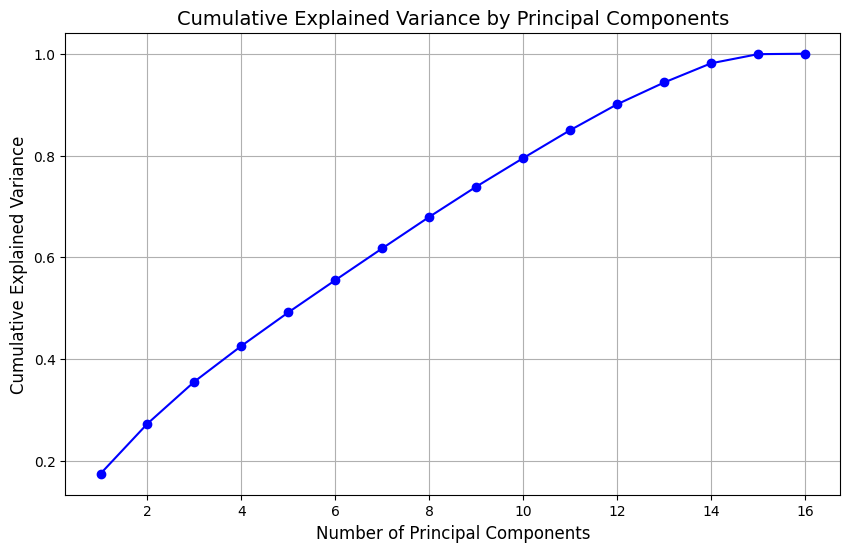

In [82]:

# Plot the incremental gain in capturing the variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), np.cumsum(explained_variance_ratio), marker='o', color='b')
plt.title('Cumulative Explained Variance by Principal Components', fontsize=14)
plt.xlabel('Number of Principal Components', fontsize=12)
plt.ylabel('Cumulative Explained Variance', fontsize=12)
plt.grid(True)
plt.show()


In [83]:

print(X_scaled.shape)
print(y_train_balanced.shape)

(307511, 16)
(307511,)


In [84]:
# Check the number of unique classes in the target variable
n_classes = len(np.unique(y_train_balanced))
print(f"Number of classes: {n_classes} , since the number of classes is 2 the number of components for LDA will be 1")

Number of classes: 2 , since the number of classes is 2 the number of components for LDA will be 1


In [85]:

# Initialize LDA with the appropriate number of components
lda = LinearDiscriminantAnalysis(n_components=1)

# Apply LDA
X_lda = lda.fit_transform(X_scaled, y_train_balanced)

# Check the shape of the transformed data
X_lda.shape


(307511, 1)

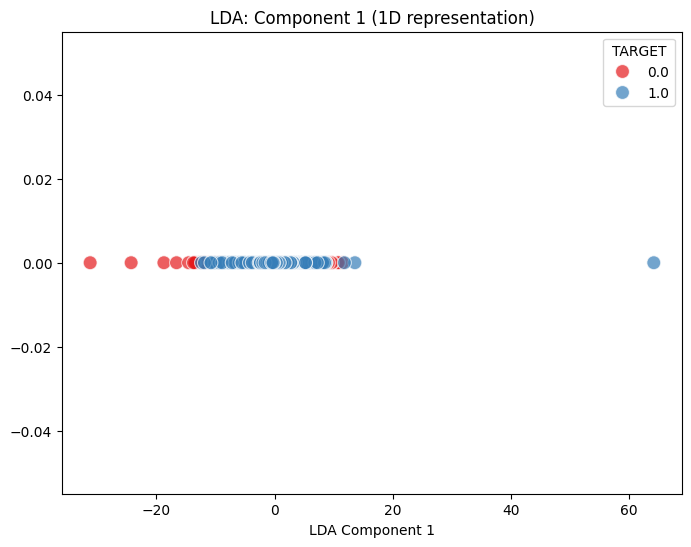

In [86]:

# Scatter plot of the LDA component (1 component)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_lda[:, 0], y=[0]*len(X_lda), hue=y_train_balanced, palette='Set1', alpha=0.7, s=100)

# Labels and title
plt.xlabel("LDA Component 1")
plt.title("LDA: Component 1 (1D representation)")

plt.show()


<ipython-input-87-946a2b9fa999>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y_train_balanced, y=X_lda[:, 0], palette='Set1')


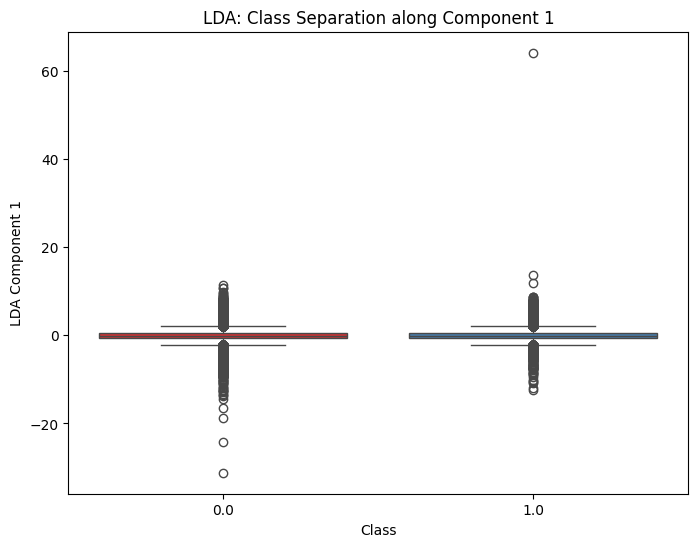

In [87]:
# Boxplot to show class separation along the LDA component
plt.figure(figsize=(8, 6))
sns.boxplot(x=y_train_balanced, y=X_lda[:, 0], palette='Set1')

# Labels and title
plt.xlabel("Class")
plt.ylabel("LDA Component 1")
plt.title("LDA: Class Separation along Component 1")

plt.show()


## II. Perform classification using naïve Bayes and interpret and visualize the results


In [92]:
#use the incremental PCA for all models
print(X_pca.shape)
print(y_train_balanced.shape)


(307511, 16)
(307511,)


In [93]:
# using GaussianNB: For continuous data that follows a Gaussian (normal) distribution.

# Initialize Gaussian Naive Bayes
nb_model = GaussianNB()

# Train the model
nb_model.fit(X_pca, y_train_balanced)

# Make predictions
y_pred_naives = nb_model.predict(X_pca)

# Evaluate the model
accuracy = accuracy_score(y_train_balanced, y_pred_naives)
print("Accuracy:", accuracy)

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_train_balanced, y_pred_naives))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_train_balanced, y_pred_naives))


# Cross-validation to evaluate the model
cv_scores = cross_val_score(nb_model, X_pca, y_train_balanced, cv=5)  # 5-fold cross-validation
print("\nCross-validation Scores:", cv_scores)
print("Mean Cross-validation Score:", cv_scores.mean())

Accuracy: 0.6064791178201755

Classification Report:
              precision    recall  f1-score   support

         0.0       0.64      0.87      0.74    197845
         1.0       0.36      0.13      0.19    109666

    accuracy                           0.61    307511
   macro avg       0.50      0.50      0.46    307511
weighted avg       0.54      0.61      0.54    307511


Confusion Matrix:
[[172359  25486]
 [ 95526  14140]]

Cross-validation Scores: [0.61684796 0.47133427 0.59650093 0.59674482 0.59490748]
Mean Cross-validation Score: 0.5752670909955493


> The model achieves an accuracy of 60.65%, but the performance is heavily skewed towards class 0 (non-defaulters). The precision for class 0 is 0.64, with a high recall of 0.87, indicating it correctly identifies most non-defaulters. However, for class 1 (defaulters), the precision drops to 0.36, and the recall is only 0.13, meaning it fails to identify a significant portion of the defaulters. This suggests that the model is not effectively capturing the minority class, and further improvements are needed to address class imbalance.

## III. Perform classification using Logistic Regression and interpret and visualize the results


In [102]:
# Initialize the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)

# Train the model on the scaled features
log_reg.fit(X_pca, y_train_balanced)

# Predict on the training set
y_pred_log = log_reg.predict(X_pca)

# Evaluate the model
accuracy = accuracy_score(y_train_balanced, y_pred_log)
print(f"Accuracy: {accuracy}")

# Classification report for precision, recall, f1-score, etc.
print("\nClassification Report:")
print(classification_report(y_train_balanced, y_pred_log))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_train_balanced, y_pred_log))

# Cross-validation scores
cross_val_scores = cross_val_score(log_reg, X_pca, y_train_balanced, cv=5)
print("\nCross-validation Scores:", cross_val_scores)
print(f"Mean Cross-validation Score: {cross_val_scores.mean()}")

Accuracy: 0.6433786108464412

Classification Report:
              precision    recall  f1-score   support

         0.0       0.64      1.00      0.78    197845
         1.0       1.00      0.00      0.00    109666

    accuracy                           0.64    307511
   macro avg       0.82      0.50      0.39    307511
weighted avg       0.77      0.64      0.50    307511


Confusion Matrix:
[[197845      0]
 [109665      1]]

Cross-validation Scores: [0.64335073 0.64337745 0.64337745 0.64337745 0.64337745]
Mean Cross-validation Score: 0.6433721070835717


> The model achieves an accuracy of 64.34%, but the performance is highly imbalanced. The precision for class 0 (non-defaulters) is 0.64, and the recall is perfect at 1.00, meaning it correctly identifies almost all non-defaulters. However, for class 1 (defaulters), the model has a precision of 1.00 but a recall of 0.00, which means it fails to identify any actual defaulters, as shown by the confusion matrix.

## IV. Perform classification using SVMs and interpret and visualize the results


In [97]:
X_train_sample, _, y_train_sample, _ = train_test_split(X_pca, y_train_balanced, train_size=0.1, random_state=42)


In [98]:
print(X_train_sample.shape)
print(y_train_sample.shape)

(30751, 16)
(30751,)


In [100]:
# Initialize the Support Vector Classifier (SVM)
svm_model = SVC(kernel='linear', random_state=42)

# Fit the model
svm_model.fit(X_train_sample, y_train_sample)

# Predict using the model
y_pred_svm = svm_model.predict(X_train_sample)

# Evaluate accuracy
accuracy = accuracy_score(y_train_sample, y_pred_svm)
print(f"Accuracy: {accuracy}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_train_sample, y_pred_svm))

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_train_sample, y_pred_svm))

# Cross-validation scores
cv_scores = cross_val_score(svm_model, X_train_sample, y_train_sample, cv=5)
print("\nCross-validation Scores:", cv_scores)
print(f"Mean Cross-validation Score: {cv_scores.mean()}")

Accuracy: 0.6416701895873305

Classification Report:
              precision    recall  f1-score   support

         0.0       0.64      1.00      0.78     19732
         1.0       0.00      0.00      0.00     11019

    accuracy                           0.64     30751
   macro avg       0.32      0.50      0.39     30751
weighted avg       0.41      0.64      0.50     30751


Confusion Matrix:
[[19732     0]
 [11019     0]]


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Cross-validation Scores: [0.64168428 0.64162602 0.64162602 0.64162602 0.64178862]
Mean Cross-validation Score: 0.6416701891291389


> The model achieves an accuracy of 64.17%, but the classification results indicate a significant issue with the model's ability to identify defaulters (class 1). While it correctly predicts all non-defaulters (class 0) with high precision and recall, it completely fails to predict any defaulters, as seen in the confusion matrix, where all 11,019 actual defaulters are incorrectly classified as non-defaulters.

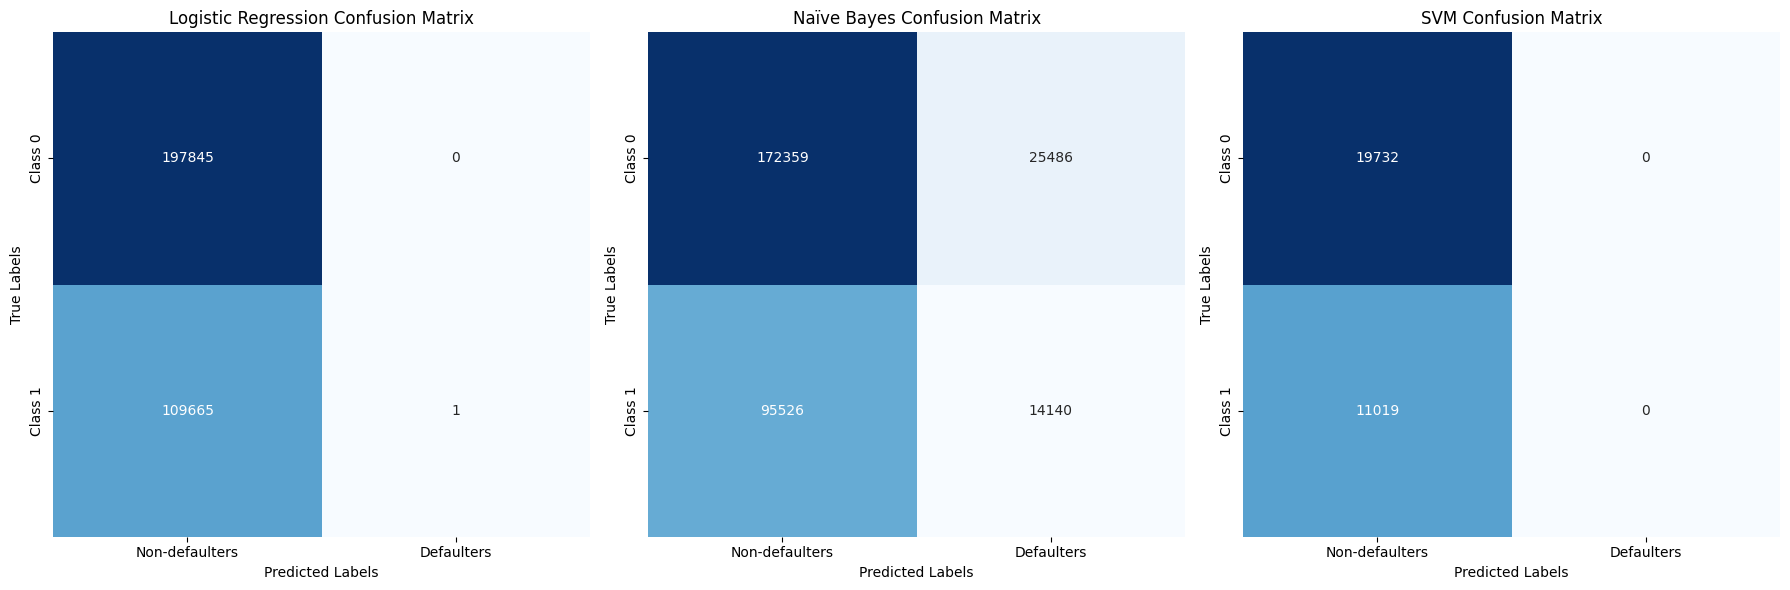

In [101]:

# Calculate confusion matrices for each model
cm_lr = confusion_matrix(y_train_balanced, y_pred_log)
cm_nb = confusion_matrix(y_train_balanced, y_pred_naives)
cm_svm = confusion_matrix(y_train_sample, y_pred_svm)

# Create subplots
fig, ax = plt.subplots(1, 3, figsize=(18, 6))

# Plot confusion matrix for Naïve Bayes
sns.heatmap(cm_nb, annot=True, fmt="d", cmap="Blues", ax=ax[1], cbar=False,
            xticklabels=["Non-defaulters", "Defaulters"], yticklabels=["Class 0", "Class 1"])
ax[1].set_title("Naïve Bayes Confusion Matrix")
ax[1].set_xlabel("Predicted Labels")
ax[1].set_ylabel("True Labels")

# Plot confusion matrix for Logistic Regression
sns.heatmap(cm_lr, annot=True, fmt="d", cmap="Blues", ax=ax[0], cbar=False,
            xticklabels=["Non-defaulters", "Defaulters"], yticklabels=["Class 0", "Class 1"])
ax[0].set_title("Logistic Regression Confusion Matrix")
ax[0].set_xlabel("Predicted Labels")
ax[0].set_ylabel("True Labels")

# Plot confusion matrix for SVM
sns.heatmap(cm_svm, annot=True, fmt="d", cmap="Blues", ax=ax[2], cbar=False,
            xticklabels=["Non-defaulters", "Defaulters"], yticklabels=["Class 0", "Class 1"])
ax[2].set_title("SVM Confusion Matrix")
ax[2].set_xlabel("Predicted Labels")
ax[2].set_ylabel("True Labels")

# Show plot
plt.tight_layout()
plt.show()



## V. Discuss which classes are most similar / different with some justification given



##### Naïves
- Without PCA
1. Accuracy: 46.28%
2. Cross-validation Scores: The scores range from 0.38 to 0.63, with a mean cross-validation score of 0.48.


- All components PCA
1. Accuracy: 60.65%
2. The cross-validation scores range from 0.47 to 0.60, with a mean score of 0.58.

Applying PCA has led to a noticeable improvement in accuracy and recall for class 0. The model is better at distinguishing non-defaulters, but it still struggles with the defaulter class, where recall remains low.

###### Logistic Regression
- Without PCA
1. Accuracy: 64.34%
2. The cross-validation scores remain consistent across multiple iterations, with a mean of 64.34%.


- All components PCA
1. Accuracy: 64.34%
2. The cross-validation scores continue to show stable performance with a mean of 64.34%

PCA did not improve the logistic regression model's ability to identify defaulters, as both the accuracy and recall values for class 1 remain unchanged.


###### SVM
- Without PCA
1. Accuracy: 64.17%
2. The cross-validation scores are consistent across iterations, with a mean of 64.17%.


- All components PCA
1. Accuracy: 64.17%
2. The cross-validation scores remain consistent with the mean of 64.17%

PCA did not improve the performance of the SVM model. The results remained identical before and after PCA, with no effect on the model's inability to detect defaulters.

All three models (Naïve Bayes, Logistic Regression, and SVM) show strong performance for class 0 (non-defaulters) but fail to effectively identify class 1 (defaulters), highlighting the issue of class imbalance. Naïve Bayes performs better in terms of recall for class 1, while Logistic Regression and SVM struggle significantly. To improve performance, class balancing techniques or more advanced models like Random Forests should be considered.









## VI. Explain how you might identify faces that are mislabeled in the dataset and provide an implementation.


To identify mislabeled classes in a dataset:

A combination of these techniques is ideal:
-  Use PCA + LDA to visualize outliers. (already used)
- Cross-Validation with Ensemble Models
- Semi-Supervised Learning (Self-Training)

### Semi-Supervised Learning (Self-Training) (sample implementation )

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.semi_supervised import SelfTrainingClassifier

base_clf = RandomForestClassifier(n_estimators=100, random_state=42)
self_training_clf = SelfTrainingClassifier(base_clf, threshold=0.7)  # Threshold for re-labeling
self_training_clf.fit(X_pca, y)


### Cross-Validation with Ensemble Models (sample implementation)

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# Train multiple models
rf = RandomForestClassifier(n_estimators=100, random_state=42)
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
svm = SVC(probability=True, random_state=42)

rf.fit(X_train, y_train)
gb.fit(X_train, y_train)
svm.fit(X_train, y_train)

# Predict on test data
rf_pred = rf.predict(X_test)
gb_pred = gb.predict(X_test)
svm_pred = svm.predict(X_test)

# Check disagreement
disagreement = (rf_pred != gb_pred) | (gb_pred != svm_pred) | (rf_pred != svm_pred)
potential_mislabeled = X_test[disagreement]

print(f"Potential mislabeled samples based on disagreement: {len(potential_mislabeled)}")
